In [1]:
import numpy as np
import os
import h5py
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [14, 9]
import scipy.signal as sg
import os  

In [32]:
data_dir = "../data_files/"

In [33]:
def get_maxima_number_by_time(file: h5py.File, variable_name: str, parameter_set_name: str) -> np.ndarray:
    times_list = []
    for dataset_name in file[variable_name + '/' + parameter_set_name]:
        times_list.append([file[variable_name + '/' + parameter_set_name + "/" + dataset_name].attrs["time"], dataset_name])
        
    times_list = sorted(times_list)
    
    maxima_number_by_time = []
    for time, dataset_name in times_list:
        # maxima_array = sg.find_peaks(file[variable_name + '/' + parameter_set_name + "/" + dataset_name], height = .001)[0]#, threshold = .00001)
        maxima_array = sg.find_peaks(file[variable_name + '/' + parameter_set_name + "/" + dataset_name], threshold = 1e-8)[0]
        maxima_number_by_time.append([time, len(maxima_array)])
        
    return np.asarray(maxima_number_by_time).transpose()

In [34]:
file_names_a0_025 = [
    "KSML1000rhoInit0.025_I.h5", # seedNum 27649.0
    "KSML1000rhoInit0.025_II.h5", # seedNum 167829
    "KSML1000rhoInit0.025_III.h5" # seedNum 866166
]

file_names_a0_03 = ["/KSML1000rhoInit0.03_I.h5"] # 27649.0

file_names_a0_04 = [
 'KSML1000rhoInit0.04_I.h5', # seedNum 89403
 'KSML1000rhoInit0.04_II.h5', # seedNum 35024
 'KSML1000rhoInit0.04_III.h5', # seedNum 2320
 'KSML1000rhoInit0.04_IV.h5', # seedNum 14362
 'KSML1000rhoInit0.04_V.h5', # seedNum 45067
 'KSML1000rhoInit0.04_VI.h5', # seedNum 52542
 'KSML1000rhoInit0.04_VII.h5', # seednum 8315
 'KSML1000rhoInit0.04_VIII.h5' # seednum 32632
]

file_names_a0_06 = [
    "/KSML1000rhoInit0.06_I.h5", # seedNum 27649.0
    "/KSML1000rhoInit0.06_II.h5" # seedNum 33664
]

In [35]:
def plot_averaged_length_scales(file_paths: list[str], color = 'k', label = '') -> list[plt.Line2D]:
    maxima_list = []
    for file_path in file_paths:
        file = h5py.File(file_path)
        maxima_list.append(get_maxima_number_by_time(file, 'rho', 'parameter_set_0'))
        file.close()
    
    minimum_number_of_time_steps = min([len(time_steps[1]) for time_steps in maxima_list])
    num_realizations = len(maxima_list)
    
    print([len(time_steps[1]) for time_steps in maxima_list])
    
    averaged_length_scales = np.zeros(minimum_number_of_time_steps)
    for realization in maxima_list:
        for i in range(minimum_number_of_time_steps):
            averaged_length_scales[i] += 1000/realization[1][i] / num_realizations
            
    return plt.plot(np.array(maxima_list[0][0][:minimum_number_of_time_steps]), averaged_length_scales, color+'-', label=label)

In [36]:
def get_timesteps(file, variable_name, parameter_set_name):    
    times_list = []
    for dataset_name in file[variable_name + '/' + parameter_set_name]:
        times_list.append(file[variable_name + '/' + parameter_set_name + "/" + dataset_name].attrs["time"])
        
    times_list = sorted(times_list)
    return times_list

[101, 101, 101]
[101]
[125, 119, 126, 127, 122, 118, 116, 119]
[101, 117]


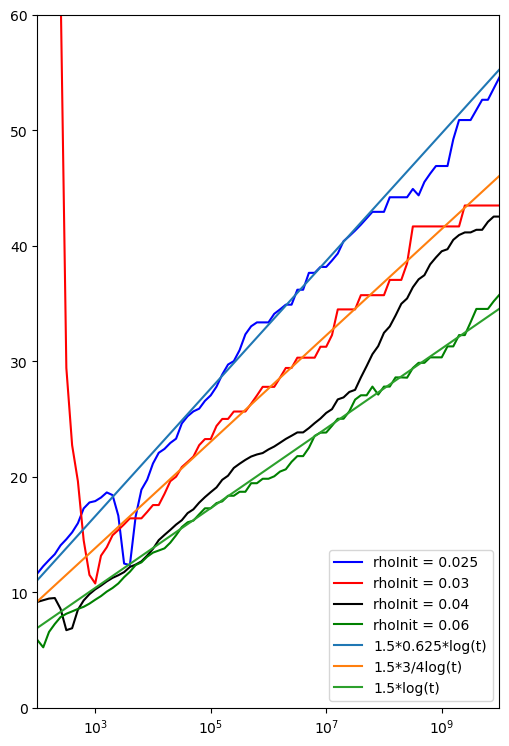

In [39]:
colors = ['b', 'r', 'g']
times = get_timesteps(h5py.File(data_dir + file_names_a0_025[0]), 'rho', 'parameter_set_0')

plot_averaged_length_scales([data_dir + file_path for file_path in file_names_a0_025], colors[0], label='rhoInit = 0.025')
plot_averaged_length_scales([data_dir + file_path for file_path in file_names_a0_03], colors[1], label = 'rhoInit = 0.03')
plot_averaged_length_scales([data_dir + file_path for file_path in file_names_a0_04], label = 'rhoInit = 0.04')
plot_averaged_length_scales([data_dir + file_path for file_path in file_names_a0_06], colors[2], label = 'rhoInit = 0.06')

plt.plot(times, [1.5/0.625*np.log(time)-0.001 for time in times], label="1.5*0.625*log(t)")
plt.plot(times, [1.5*4/3*np.log(time)-0.001 for time in times], label="1.5*3/4log(t)")
plt.plot(times, [1.5*np.log(time)+0.008 for time in times], label="1.5*log(t)")

plt.xscale("log")
plt.xticks((1e3,1e5,1e7,1e9))
plt.ylim((0,60))
plt.xlim((100,1e10))
plt.legend()
plt.gca().set_aspect(.2)
plt.show()
# plt.savefig("coarsening_fig.pdf")